In [1]:
def calculate_collision(d1,d2,r,b):
    p1 = 1-(1-(1-d1)**r)**b
    p2 = 1-(1-(1-d2)**r)**b
    return (p1,p2)
def find_rb(d1,d2,p1,p2,limit_iterations=50):
    r = 1
    b = 1
    new_p1,new_p2 = calculate_collision(d1,d2,r,b)
    iterations = 0
    while not (new_p1 >= p1 and new_p2 <= p2) or iterations>limit_iterations:
        new_p1,new_p2 = calculate_collision(d1,d2,r,b)
        print(f"Iteracion {iterations}: r={r},b={b},p1'={new_p1},p2={new_p2}")
        if new_p2 > p2:
            r += 1
        elif new_p1 < p1:
            b += 1
        iterations += 1
        if iterations > limit_iterations:
            print(f"Se alcanzó el límite de {limit_iterations} iteraciones")
            break
    print(f"Con r={r} min hashes y b={b} buckets tengo p1'={new_p1} y p2'={new_p2}")
    return (r,b)

In [2]:
find_rb(0.2,0.8,0.88,0.16)

Iteracion 0: r=1,b=1,p1'=0.8,p2=0.19999999999999996
Iteracion 1: r=2,b=1,p1'=0.6400000000000001,p2=0.040000000000000036
Iteracion 2: r=2,b=2,p1'=0.8704000000000001,p2=0.07840000000000003
Iteracion 3: r=2,b=3,p1'=0.9533440000000001,p2=0.11526400000000014
Con r=2 min hashes y b=3 buckets tengo p1'=0.9533440000000001 y p2'=0.11526400000000014


(2, 3)

In [3]:
def h(mh1,mh2,mh3):
    return (3*mh1 + 1*mh2 + 1*mh3)%7

In [4]:
h(2,0,0)

6

In [5]:
h(3,2,2)

6

In [6]:
h(1,3,1)

0

In [7]:
calculate_collision(0.15,0.85,3,4)

(0.9778289342466404, 0.013431809893691193)

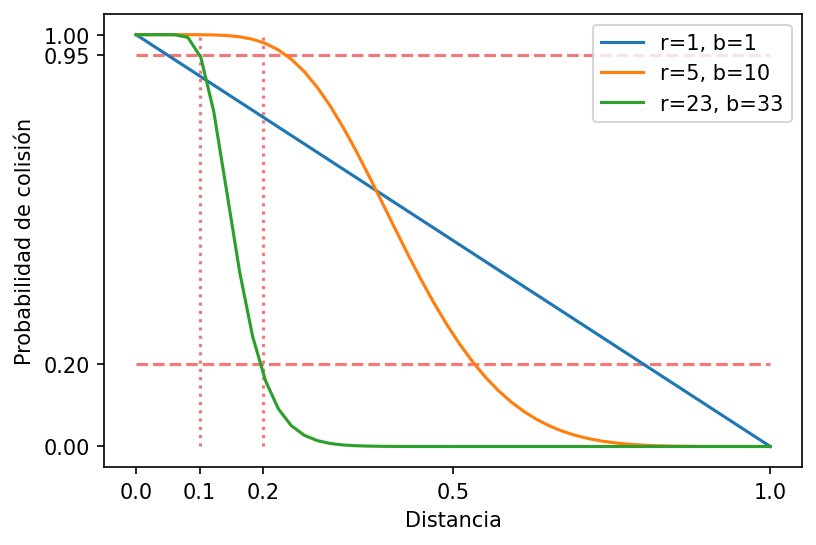

In [9]:
import matplotlib.pyplot as plt
import numpy as np

N=50
p1=0.95
p2=0.2
d1=1-0.9
d2=1-0.8

D = np.linspace(0, 1, num=N)

plt.figure(dpi=150)
for (r,b) in [(1,1), (5,10), (23, 33)]:    
    p = lambda d: 1-(1-(1-d)**r)**b
    plt.plot(
        D, 
        [p(d) for d in D], 
        label=f"r={r}, b={b}"
    )

plt.vlines(d1, 0, 1, color="#f27977", linestyles="dotted")
plt.vlines(d2, 0, 1, color="#f27977", linestyles="dotted")
plt.hlines(p1, 0, 1, color="#f27977", linestyles="dashed")
plt.hlines(p2, 0, 1, color="#f27977", linestyles="dashed")
plt.xticks([0, d1, 0.5, d2, 1])
plt.yticks([0, p2, p1,1])

plt.ylabel("Probabilidad de colisión")
plt.xlabel("Distancia")
plt.legend()